In [1]:
# https://towardsdatascience.com/making-your-own-discover-weekly-f1ac7546fedb
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
from config import client_id, client_secret, redirect_uri, username, good_playlist_id, bad_playlist_id
import numpy as np
import pandas as pd

#client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
#sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
scope = 'user-library-read playlist-read-private'
token = util.prompt_for_user_token(username, scope, client_id=client_id, client_secret=client_secret, redirect_uri=redirect_uri)
if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

In [2]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username, playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [3]:
good_tracks = get_playlist_tracks(username, good_playlist_id)

data_good = []

for i in range(len(good_tracks)):
    row = [good_tracks[i]['track']['id'],
          good_tracks[i]['track']['name'],
          good_tracks[i]['track']['popularity']]
    data_good.append(row)

df_good = pd.DataFrame(data=data_good,columns=['id','name','popularity'])
df_good.tail()

,id,name,popularity
259,70nr0Rr3BFoxZo8ZOAgHdE,Thinkin Bout U - VIP Mix,37
260,1f4p1hDsYdSrgmNeIlwpad,Bad Timing (with loren north),41
261,7kGIyYQc44EQcJR3HH314y,Better Not (feat. Wafia) - Shaun Frank Remix,44
262,19Y4vTCoDl0Nu4fnO6jMZE,Dirty Mind - Disco Fries Remix (feat. Ty Dolla...,34
263,6D5pfooPP6hi99RaXjkDsP,Summertime Sadness [Lana Del Rey vs. Cedric Ge...,13


In [4]:
df_good.to_csv('good_songs.csv', index=False)

In [5]:
bad_tracks = get_playlist_tracks(username, bad_playlist_id)

data_bad = []

for i in range(len(bad_tracks)):
    row = [bad_tracks[i]['track']['id'],
          bad_tracks[i]['track']['name'],
          bad_tracks[i]['track']['popularity']]
    data_bad.append(row)

df_bad = pd.DataFrame(data=data_bad,columns=['id','name','popularity'])
df_bad.tail()

,id,name,popularity
236,1mKXFLRA179hdOWQBwUk9e,Just Give Me a Reason (feat. Nate Ruess),76
237,2ZQ4Q9xL7W8FEgO1d4o7YH,Don't Let Me Get Me - Radio Edit,10
238,5rgy6ghBq1eRApCkeUdJXf,We Are Young (feat. Janelle Monáe),70
239,67WTwafOMgegV6ABnBQxcE,Some Nights,67
240,53Y0kdCa1CZ9gRqEuknfwy,Bang My Head (feat. Sia & Fetty Wap),62


In [6]:
df_bad.to_csv('bad_songs.csv', index=False)

In [7]:
good_ids=df_good['id'].tolist()

# Create a function called "chunks" with two arguments, l and n:
def chunks(l, n):
    # For item i in a range that is a length of l,
    for i in range(0, len(l), n):
        # Create an index range for l of n items:
        yield l[i:i+n]
        
# Create a list that from the results of the function chunks:
batch1 = list(chunks(good_ids, 50))[0]

In [8]:
# audio features - GOOD
good_features = sp.audio_features(tracks=batch1)

df_features_good = pd.DataFrame(good_features)
df_features_good.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.0383,https://api.spotify.com/v1/audio-analysis/6wQY...,0.839,171375,0.613,6wQYKyGePaqstYov2C1S5b,0.000000,2,0.323,-6.457,1,0.0463,125.011,4,https://api.spotify.com/v1/tracks/6wQYKyGePaqs...,audio_features,spotify:track:6wQYKyGePaqstYov2C1S5b,0.667
1,0.0145,https://api.spotify.com/v1/audio-analysis/0bya...,0.733,223533,0.839,0byab45cmZntz74RxcASrf,0.000187,1,0.162,-2.840,0,0.0335,126.009,4,https://api.spotify.com/v1/tracks/0byab45cmZnt...,audio_features,spotify:track:0byab45cmZntz74RxcASrf,0.471
2,0.0534,https://api.spotify.com/v1/audio-analysis/40xL...,0.732,212788,0.785,40xLrjniJVkxuWbka7KavC,0.000048,0,0.388,-5.081,1,0.0470,121.987,4,https://api.spotify.com/v1/tracks/40xLrjniJVkx...,audio_features,spotify:track:40xLrjniJVkxuWbka7KavC,0.256
3,0.0933,https://api.spotify.com/v1/audio-analysis/3FCl...,0.761,203976,0.696,3FClUxQc36bQc6kNlXzadI,0.168000,6,0.158,-6.837,1,0.1270,124.002,4,https://api.spotify.com/v1/tracks/3FClUxQc36bQ...,audio_features,spotify:track:3FClUxQc36bQc6kNlXzadI,0.664
4,0.3100,https://api.spotify.com/v1/audio-analysis/2yuo...,0.876,209634,0.741,2yuoF9C4QF9kCsoDf3yUHP,0.018500,11,0.110,-4.836,0,0.0435,122.967,4,https://api.spotify.com/v1/tracks/2yuoF9C4QF9k...,audio_features,spotify:track:2yuoF9C4QF9kCsoDf3yUHP,0.695


In [9]:
# features documentation https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

In [10]:
mylist = [1,2,3,4,5]
mylist[1]

# weird thing about lists indexing https://stackoverflow.com/questions/3451157/python-list-sublist-selection-1-weirdness

2

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()

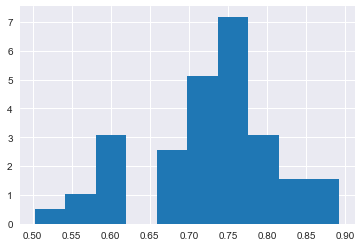

In [16]:
# basic plots of features - distribution

#plt.bar(df_features_good.index, df_features_good['danceability']);
plt.hist(df_features_good['danceability'], density=True);

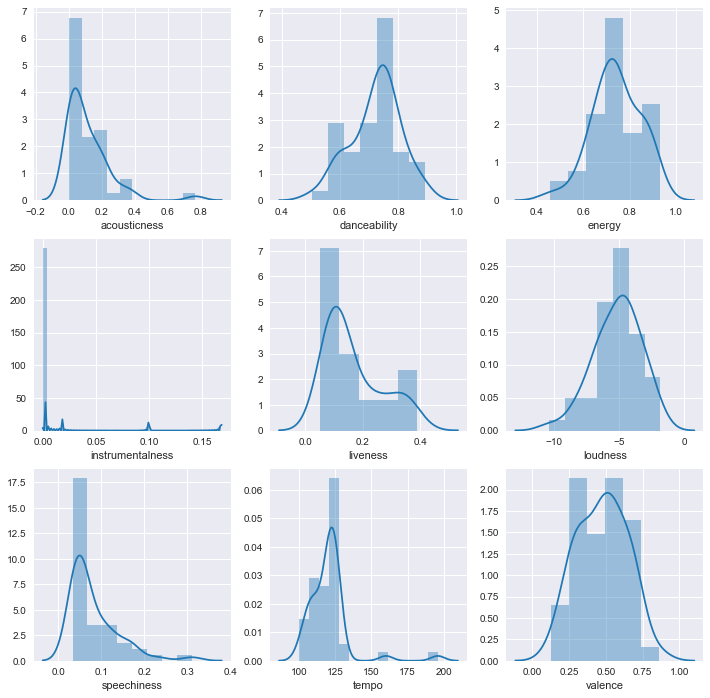

In [29]:
import warnings
warnings.filterwarnings('ignore')

sns.set_palette("tab10")

f, axes = plt.subplots(3, 3, figsize=(12,12))

sns.distplot(df_features_good['acousticness'], ax=axes[0,0]);
sns.distplot(df_features_good['danceability'], ax=axes[0,1]);
sns.distplot(df_features_good['energy'], ax=axes[0,2]);

sns.distplot(df_features_good['instrumentalness'], ax=axes[1,0]);
sns.distplot(df_features_good['liveness'], ax=axes[1,1]);
sns.distplot(df_features_good['loudness'], ax=axes[1,2]);

sns.distplot(df_features_good['speechiness'], ax=axes[2,0]);
sns.distplot(df_features_good['tempo'], ax=axes[2,1]);
sns.distplot(df_features_good['valence'], ax=axes[2,2]);

In [24]:
#sns.distplot(df_features_good['danceability']);